# California Housing Price Prediction

The objective of this project is to build a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## Loading the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('1553768847_housing.xlsx')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
len(df)

20640

In [5]:
x = df.drop(columns= 'median_house_value')
y = df['median_house_value']

## Data Cleaning

In [8]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [9]:
y.isna().sum()

0

We fill the missing values with the mode.

In [16]:
x.fillna(x['total_bedrooms'].mode()[0], inplace=True)

In [17]:
x.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Now we convert categorical data to numerical.

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [24]:
x['ocean_proximity'] = le.fit_transform(x['ocean_proximity'])

In [25]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


Next, we split the dataset in 80% training and 20% testing.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=0)

Now we standardize the train and test sets.

In [28]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc = StandardScaler()

In [78]:
sc.fit(x_train)

StandardScaler()

In [79]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

We have prepared our data and now we can perform a Linear Regression.

## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
model = LinearRegression()

In [37]:
model.fit(x_train_std, y_train)

LinearRegression()

In [39]:
model.score(x_train_std, y_train)

0.6376688061962795

Our R squared is 63.77% for the train set. We will now predict y using the test set of x (standardized).

In [42]:
y_pred = model.predict(x_test_std)

And now that we have our prediction we will proceed to calculate the mean_squared_error.

In [43]:
y_true = y_test

In [63]:
import numpy as np

In [64]:
np.sqrt(mean_squared_error(y_true, y_pred))

69877.8776438068

In [45]:
import matplotlib.pyplot as plt

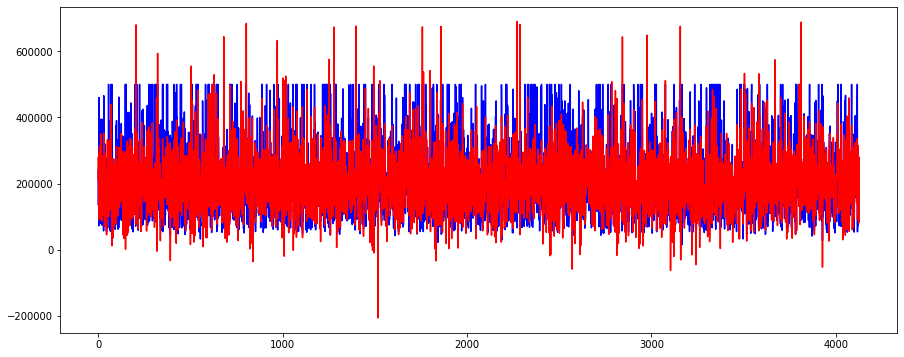

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(y_true.values, color='b')
plt.plot(y_pred, color='r')

The root mean squared error is 69877.88. We now try to improve our predictions using Decision Tree.

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor()

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)

DecisionTreeRegressor()

Now we predict the values using the fitted decision tree regressors and calculate the root mean squared errors.

In [68]:
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
y_3 = regr_3.predict(x_test)

In [65]:
np.sqrt(mean_squared_error(y_true, y_1))

87111.74596989232

In [66]:
np.sqrt(mean_squared_error(y_true, y_2))

70569.0729746292

In [69]:
np.sqrt(mean_squared_error(y_true, y_3))

66788.81451612595

We have obtained better root square mean error with the linear regression for 2 of the 3 trees. However, we will see how Random Forests perform in this case.

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf = RandomForestRegressor()

In [72]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [73]:
y_pred_rf = rf.predict(x_test)

In [74]:
np.sqrt(mean_squared_error(y_true, y_pred_rf))

48895.24728932417

We have obtained the lowest mean squared error using Random Forest Regressor.